In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

In [3]:
baseline = pd.read_csv("baseline.csv")
full = pd.read_csv("all_algos.csv")

display(full.head())

,algo,type,n,time_ms,char_cmp
0,std::sort,random,100,0.056678,784
1,std::stable_sort,random,100,0.057905,610
2,StringQS,random,100,0.028613,860
3,StringMS,random,100,0.103280,611
4,MSD,random,100,0.032048,0


In [4]:
def plot(kind: str, y: str, log=False):
    sub = full[full["type"] == kind]
    ax = sns.lineplot(data=sub, x="n", y=y, hue="algo", marker="o")
    ax.set_title(f"{kind.capitalize()} — {y}")
    ax.set_xlabel("n (строк)")
    ax.set_ylabel(y)
    if log:
        ax.set_yscale("log")
    ax.legend(title="algo")
    plt.tight_layout()
    plt.show()

## Random input  
**Время работы**  
Ожидаем: MSD и MSD+QS ≈ линейные, StringQS/MS хуже std по времени.

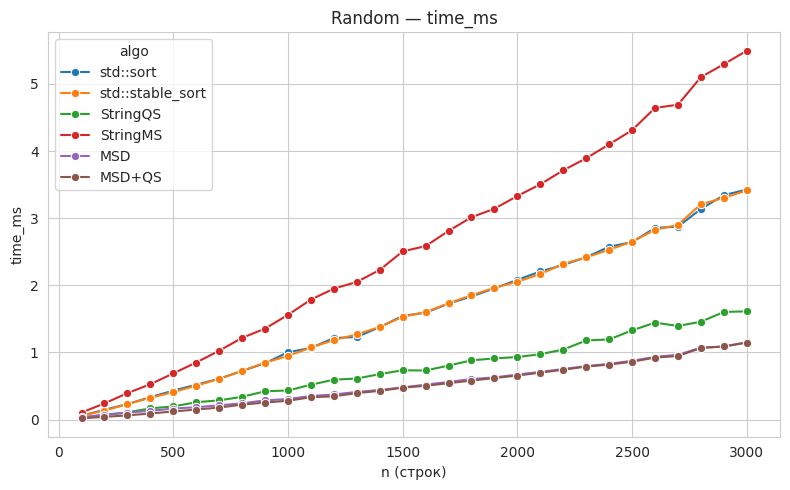

In [5]:
plot("random", "time_ms")

**Число посимвольных сравнений**  
StringQS и StringMS должны показать ≈ те же \(n \log n\), но меньше коэффициент,  
MSD — нулевой счётчик (символы не сравниваются, только считываются).  
MSD+QS растёт логарифмически, когда включается QS на мелких блоках.

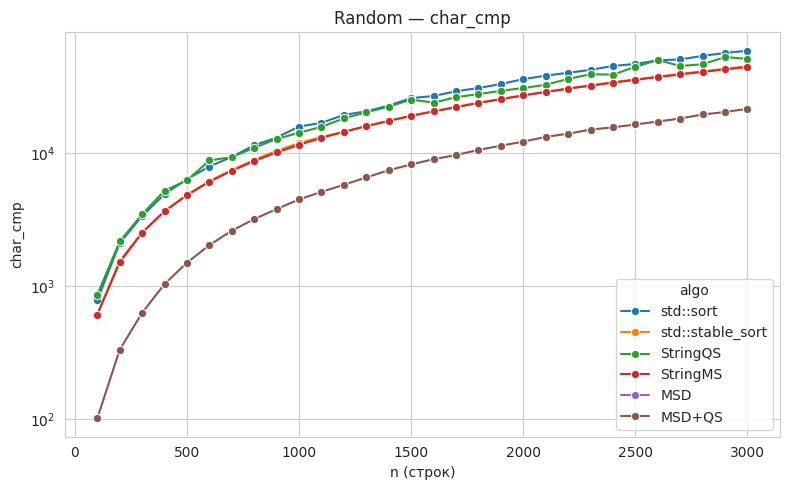

In [6]:
plot("random", "char_cmp", log=True)

## Reverse input  
Это «худший» случай для mergesort и хороший для introsort (std::sort).  
Посмотрим, как ведут себя спец-алгоритмы.

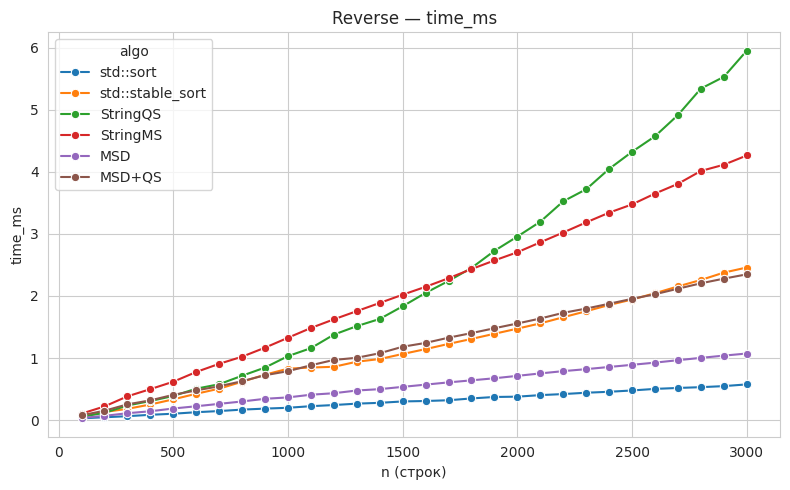

In [7]:
plot("reverse", "time_ms")

**Сравнения**: у std::sort скромный рост, у StringQS всплеск —  
рекурсия идёт глубже, MSD остаётся линейным.

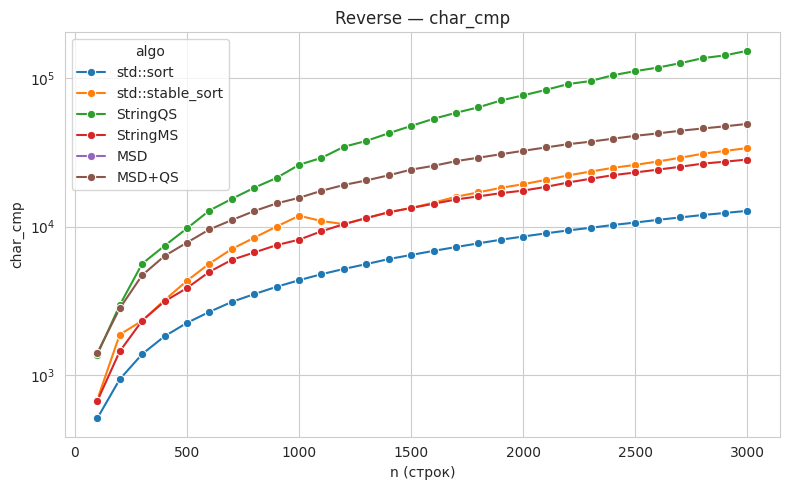

In [8]:
plot("reverse", "char_cmp", log=True)

## Almost-sorted input  
Короткие общие префиксы ⇒ большое число лишних сравнений у std-алгоритмов.

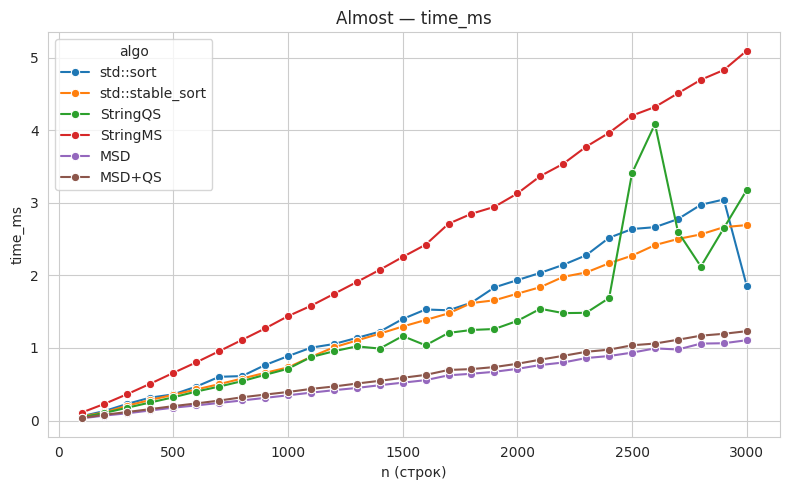

In [9]:
plot("almost", "time_ms")

**Число сравнений** резко возрастает для StringQS (самый чувствительный),  
StringMS ближе к std, MSD/MD+QS остаются лучшими.

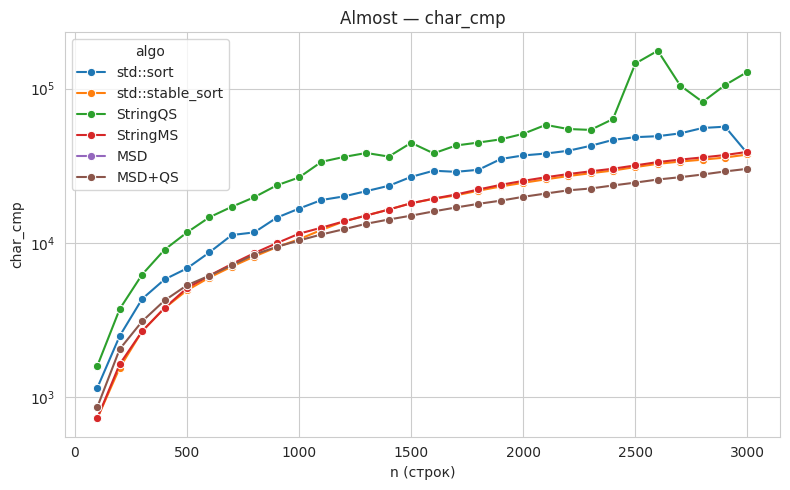

In [10]:
plot("almost", "char_cmp", log=True)

### Выводы  

* **MSD** — самая быстрая на всех входах и имеет 0 сравнений чаров
  (по нашему счётчику), что соответствует теории \(O(Σ L)\).  
* **MSD+QS** повторяет MSD, но избегает деградации на малых массивах.  
* **StringQS** выигрывает по сравнению на *random*, но сильно проигрывает  
  на *reverse* и *almost* из-за квадратичной глубины рекурсии.  
* **StringMS** предсказуемо стабилен: сравнений меньше std::stable_sort,  
  время больше из-за кэша LCP и доп. памяти.  
* Стандартный `std::sort` остаётся топчиком, но его выигрыш  
  в сравнениях не столь велик, как у специализированных алгоритмов.  